In [1]:
from skimage.io import imread, imshow
from skimage import img_as_float
from numpy import roll, dstack, sum as npsum
from matplotlib.pyplot import pause

In [2]:
def display_imgs(imgs, pauseTime = .01):
    """Отображает все изображения в списке imgs"""
    for img in imgs:
        imshow(img)
        pause(pauseTime)

def cut_borders(img, percentToCut):
    """
    Обрезает изображение по каждому краю
    img - изображение
    percentToCut - процент от размера оси изображения, который нужно обрезать
    """
    h, w = img.shape
    l_cut = h * percentToCut // 100
    r_cut = h - l_cut
    u_cut = w * percentToCut // 100
    b_cut = w - u_cut
    return img[l_cut: r_cut, u_cut: b_cut]

def split_imgs(img, percentToCut):
    """
    Разбивает изображение по вертикали на 3 равных части
    img - изображение
    percentToCut - процент, на который должны быть обрезаны изображения
    """
    h, _ = img.shape
    h = h // 3
    rgb = [img[h * 2: h * 3], img[h: h * 2], img[0: h]]
    return [cut_borders(i, percentToCut) for i in rgb]

def find_align(im1, im2, alignRange):
    """
    Подбирает лучшее смещение изображений в пикселях
    im1, im2 - изображения
    alignRange - предел смещения в пикселях, поиск производится в пределах от -alignRange до alignRange
    """
    rng = range(-alignRange, alignRange + 1)
    best_corr = 0
    best_i = (0, 0)
    for i in rng:
        for j in rng:
            tmp = roll(roll(im2, i, axis = 0), j, axis = 1)
            x = npsum(tmp * im1)
            if x > best_corr:
                best_corr = x
                best_i = (i, j)
    return best_i

def align(img, percentToCut, alignRange):
    """
    Совмещает три монохромных изображения, расположенные в одном по вертикали
    img - изображение, содержащее в себе три, которые нужно совместить
    percentToCut - процент, на который должны быть обрезаны изображения
    alignRange - предел смещения в пикселях, поиск производится в пределах от -alignRange до alignRange
    """
    r, g, b = (img_as_float(im) for im in split_imgs(img, percentToCut))
    
    r_shifts = find_align(g, r, alignRange)
    b_shifts = find_align(g, b, alignRange)
    
    r = roll(roll(r, r_shifts[0], axis = 0), r_shifts[1], axis = 1)
    b = roll(roll(b, b_shifts[0], axis = 0), b_shifts[1], axis = 1)
    
    return dstack((r, g, b))

In [3]:
imgNums = range(3)
percentToCut = 10
alignRange = 15

In [4]:
imgs = [imread(f'img{i}.jpg') for i in imgNums]

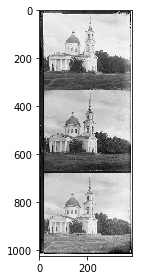

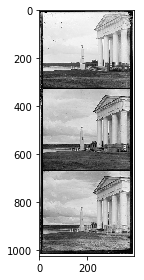

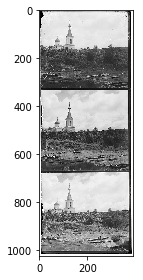

In [5]:
display_imgs(imgs)

In [6]:
aligned = [align(img, percentToCut, alignRange) for img in imgs]

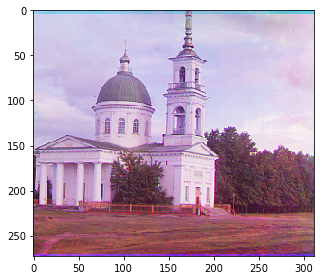

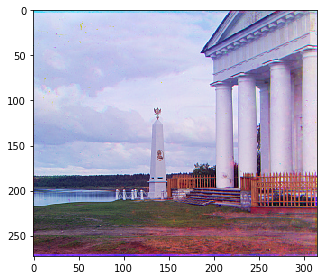

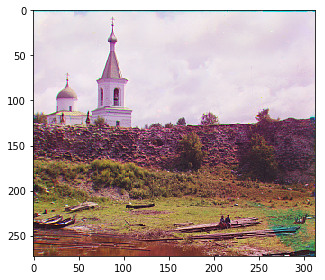

In [7]:
display_imgs(aligned)